## Simulating 2D X-ray Diffraction Patterns using SimDAT2D

In [30]:
#Import the required libraries

import SimDAT2D.SimDAT2D as sim
from SimDAT2D import masking
import matplotlib.pyplot as plt

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO


Enter the number of the selected calibrant:  17


NaCl


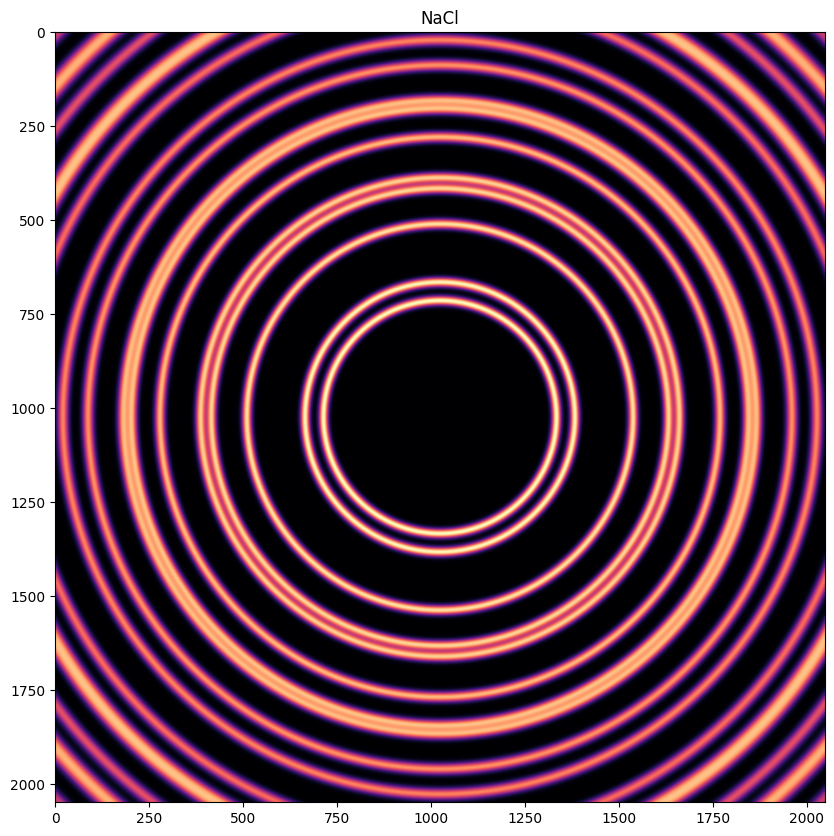

In [26]:
#creating the isotropic scattering signal

iso = sim.create_isotropic(.4, .5e-10, 'magma')

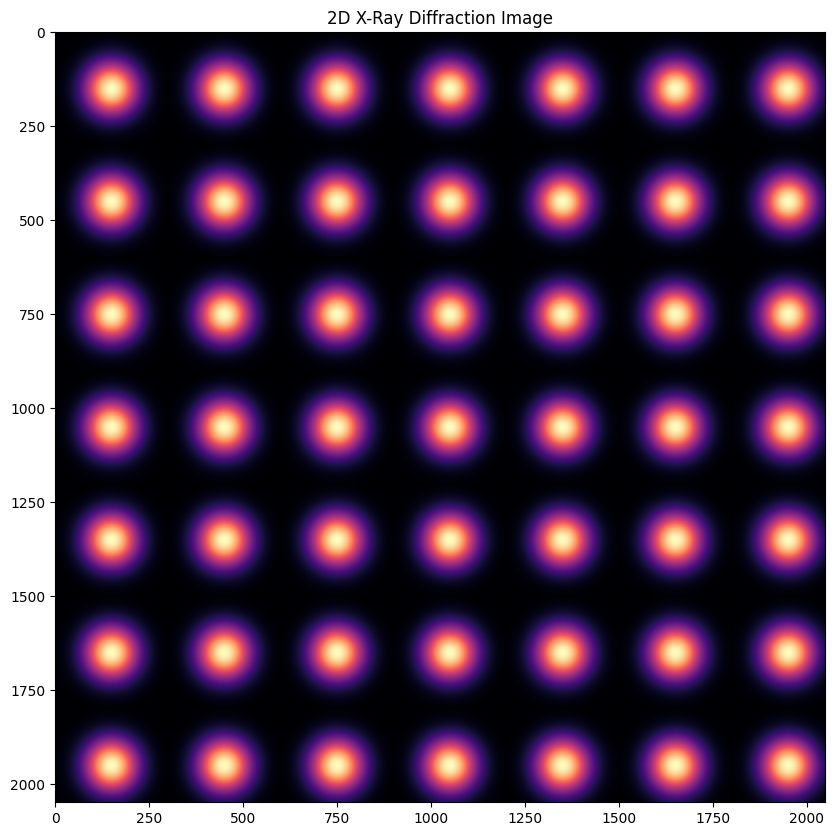

In [27]:
#creating the anisotropic scattering signal

aniso = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')

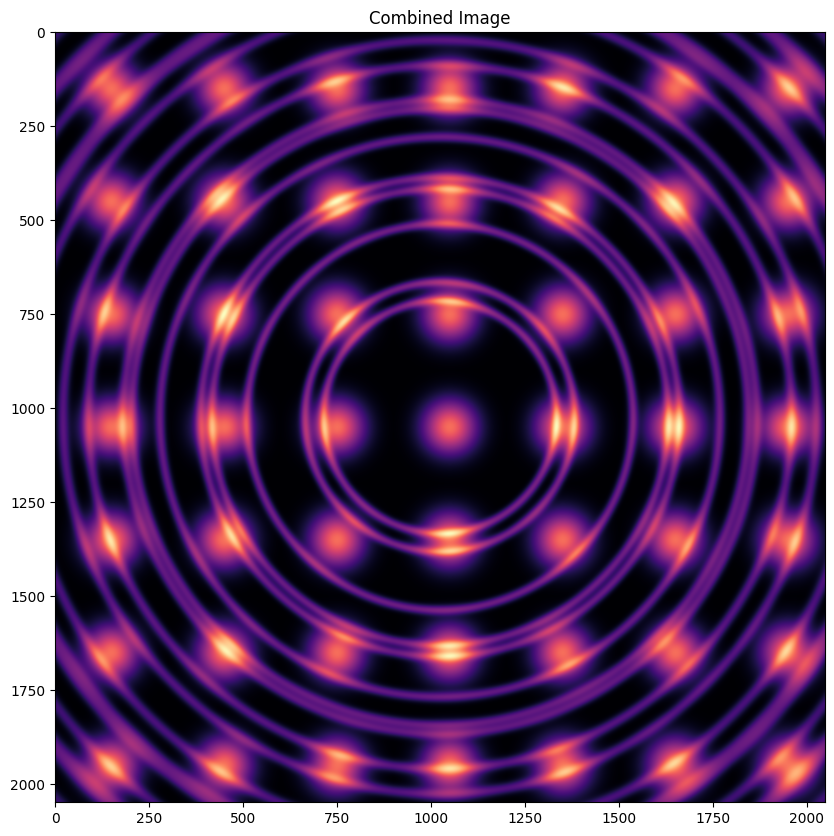

In [28]:
#combining signals 
thin_film = sim.combine_image(iso, aniso*2, cmap= 'magma')

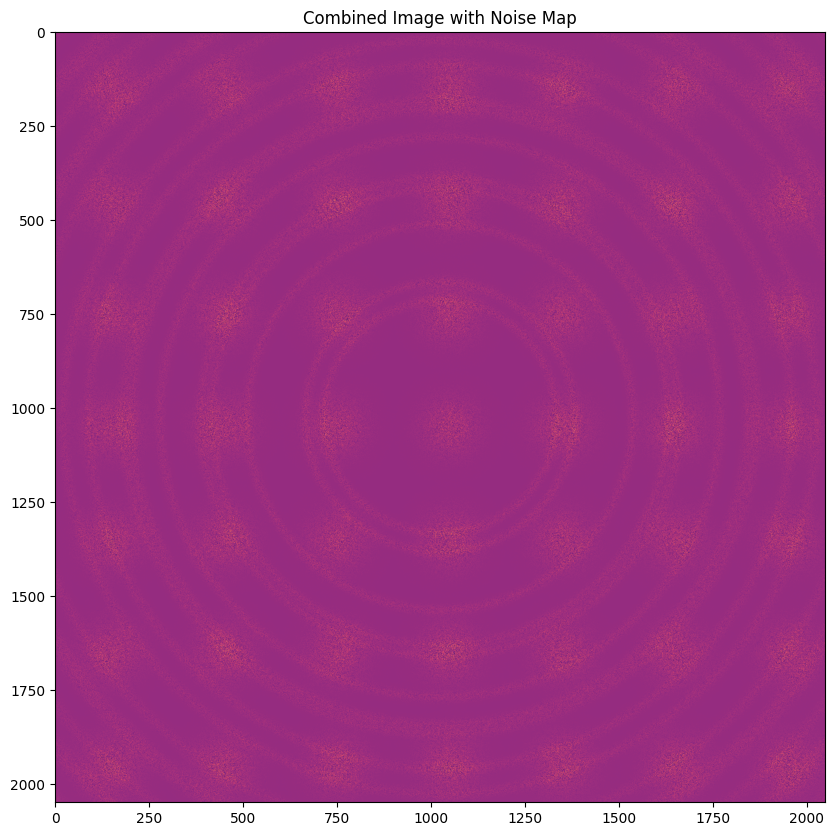

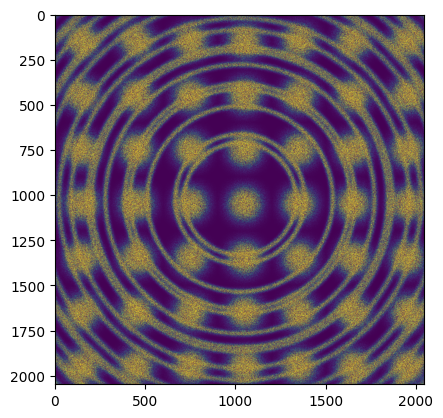

In [31]:
#For noisy data
noisy_im = sim.generate_noisemap(thin_film, cmap = 'magma');

plt.imshow(noisy_im, vmin = 0, vmax = 5)

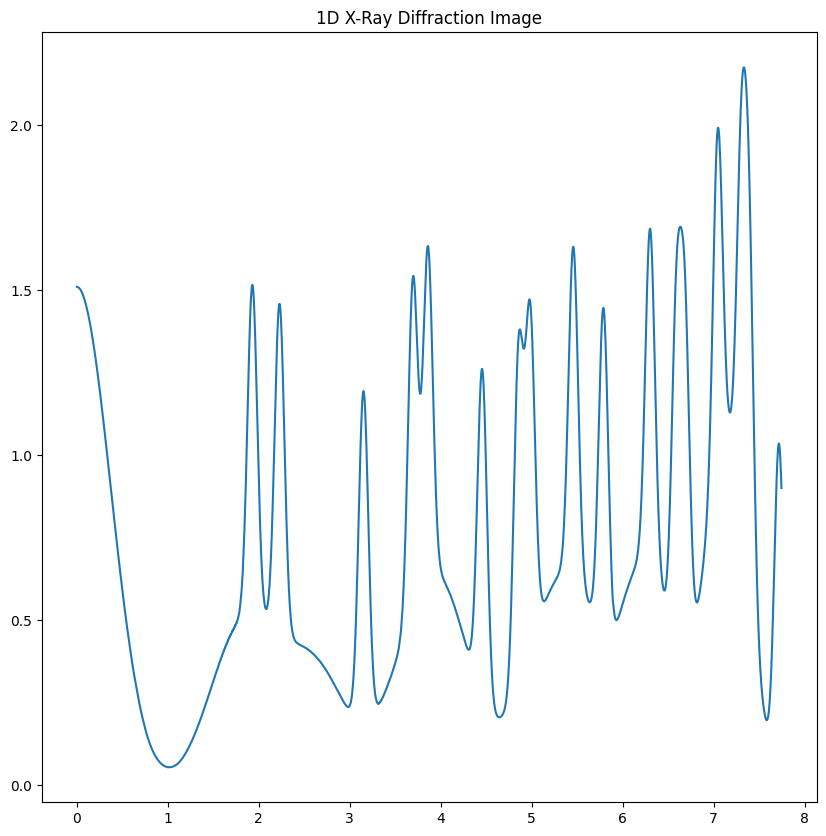

In [41]:
#integrating the simulated pattern

q, int_im = sim.integrate_image(thin_film, .4, .5e-10, show = True)

In [45]:
#creating a mask for the thin film image

array, integrator = masking.make_chi_array(thin_film, .4, .5e-10)

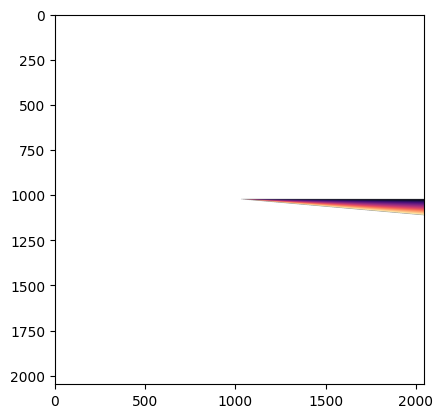

In [50]:
#creating a mask using masking library

first_mask = masking.slice_mask(array, 5, plot = True)

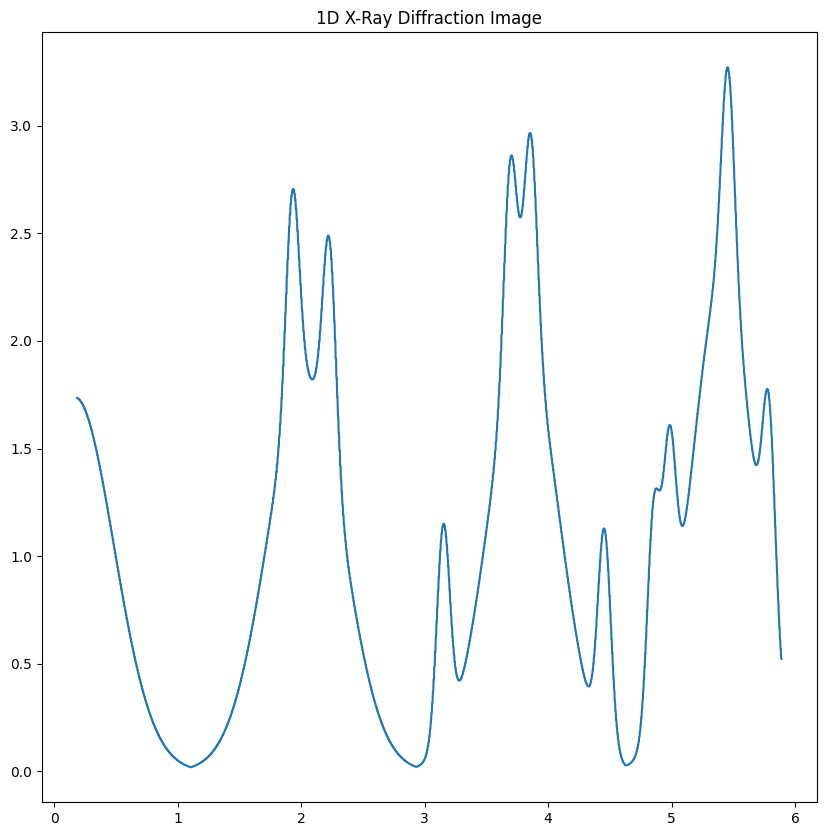

In [47]:
#integrating the simulated pattern with mask

q, int_im = sim.integrate_image(thin_film, .4, .5e-10, mask = first_mask, show = True)

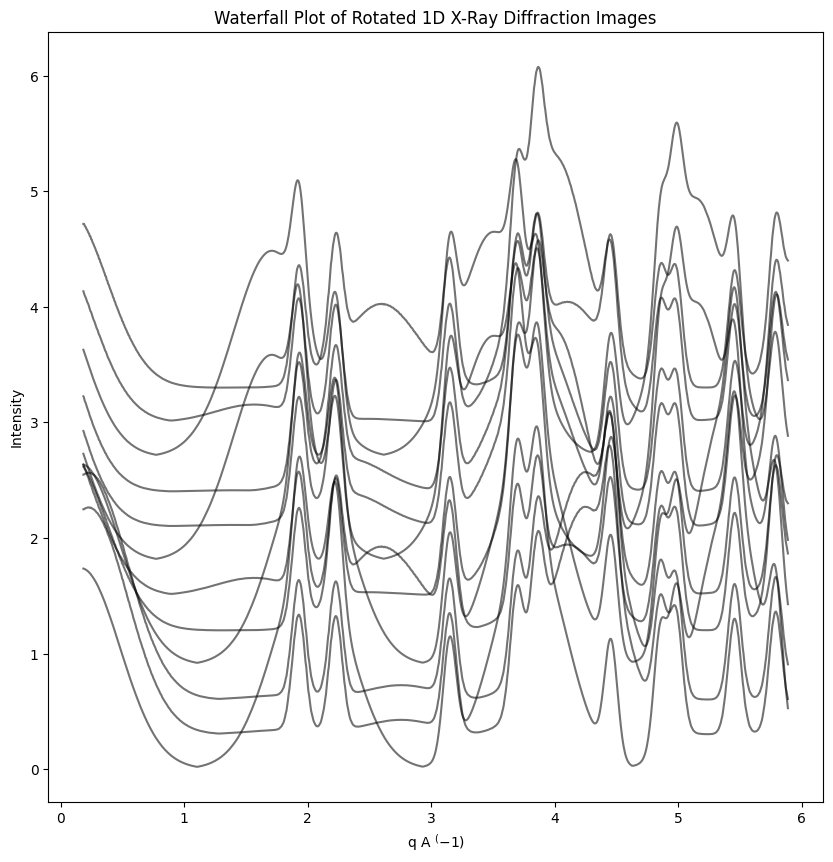

In [53]:
#using the rotate and integrate function

q, rotated_data = sim.rotate_and_integrate(thin_film, 30, .4, .5e-10, resolution = 1000, mask = first_mask)